# Expectation-Maximization (EM) Algorithm

Assume x is a mixture of two normal distributions, and the there is an unknown variable Z that governs the selection. When Z = 0, x is from the first normal distribution, and when Z=1, x is from the second.

In [7]:
import numpy as np
x1 = np.random.normal(20,5,3000)
x2 = np.random.normal(40,5,7000)
x = np.append(x1,x2)

In [10]:
len(x)

10000

In [11]:
import matplotlib.pyplot as plt

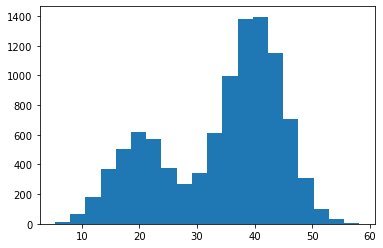

In [15]:
plt.hist(x,bins=20)
plt.show()

### E-step

In the first iteration of the E-step, we set the initial values for the unknown parameters $(p , \mu_1, \mu_2, \sigma_1, \sigma_2)$,where p is the a priori probability $P(Z=1)$. Give the parameters, the conditional distribution of Z is determined by Bayes theorem.

$$P(Z_i=1|x_i,\theta) = \frac{pf(x_i|\theta_1,z_i=1)}{pf(x_i|\theta_1,z_i=1)+(1-p)f(x_i|\theta_2,z_i=0)}$$

This provide the first estimate of the Z column. One can use this probability to conduct a random draw from {0,1}.

### M-step

Repeat E-M

In [29]:
import scipy.stats as stats
from scipy.optimize import minimize

In [37]:
def ll(theta, x, z):
    obj = np.where(z==1,np.log(theta[0])+stats.norm.logpdf(x,theta[1],theta[3]),np.log(1-theta[0])+stats.norm.logpdf(x,theta[2],theta[4])).sum()
    return -obj

In [84]:
theta = (0.5,10,50,5,5) #initial guess

for i in range(3000):
    num = theta[0]*stats.norm.pdf(x,theta[1],theta[3])
    denom = (theta[0]*stats.norm.pdf(x,theta[1],theta[3])+(1-theta[0])*stats.norm.pdf(x,theta[2],theta[4]))
    z = (num/denom).round(0) #0.5 is the threshold
    theta = minimize(ll, x0=theta, args=(x,z),bounds=[(0.1,0.9),(0,100),(0,100),(1,10),(1,10)]).x

In [85]:
theta

array([ 0.2924    , 19.74374535, 39.98597125,  4.59654077,  4.9944348 ])

### Another way to set up EM

Note that our final goal is to estimate $\theta=(\mu_1,\mu_2,\sigma_1,\sigma_2)$, but not necessarily p. So we can set up a MLE with x values only.

$$\max lnf(x|\theta)$$

$$lnf(x|\theta) = ln\frac{f(x,z|p,\theta)}{f(z|x,p,\theta)} = lnf(x,z|p,\theta) - lnf(z|x,p,\theta)$$

$$\begin{align} lnf(x|\theta) &= \sum_z p(z|x,p_t,\theta_t)lnf(x,z|p,\theta) - \sum_z p(z|x,p_t,\theta_t)lnf(z|x,p,\theta) \\ &=Q(\theta|\theta_t) + H(\theta|\theta_t) \end{align}$$

Because optimization aims at finding $\theat$ to improve the objective function, we subtract the previous step 